In [1]:
# module load anacondapy/3.4
# module load pyger
# source activate bnk
# export $(dbus-launch)
# python
import brainiak.eventseg.event
import numpy as np
import glob
import os
import scipy.io
from scipy.stats import stats
import logging
import matplotlib.pyplot as plt
from scipy import stats
import h5py

# logging.basicConfig(level=logging.DEBUG)

/jukebox/pkgs/PYGER/neu350/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
# experiment specific parameters
expdir = '/scratch/claire/speaker-listener/'
timeUnit='tr'
froidir='mor';
exps=['pieman','bronx','merlin','sherlock']
rname='vPCUN'
exp='merlin'
K=26

In [32]:
# hmm=np.load(expdir +  exp+ '/fmri/hmm/'+ rname + '_findListenersEventInSpeaker.npz')
# segments_LG=hmm['segments_LG']
# segments_L=hmm['segments_L']
# segmentsLG_S=hmm['segmentsLG_S']
# segmentsL_S=hmm['segmentsL_S']
# segmentsLG_L=hmm['segmentsLG_L']

filename = expdir +  exp+ '/fmri/hmm/'+ rname + '_findListenersEventInSpeaker.hdf5'
f=h5py.File(filename, 'r')
segments_LG = f['segments_LG'].value
segmentsLG_S = f['segmentsLG_S'].value
segmentsLG_L = f['segmentsLG_L'].value
segments_L = f['segments_L'].value
segmentsL_S = f['segmentsL_S'].value
f.close()

subjn=len(segments_L)
tn=segments_LG.shape[0]


In [33]:
f.close()

-29.456141962185654


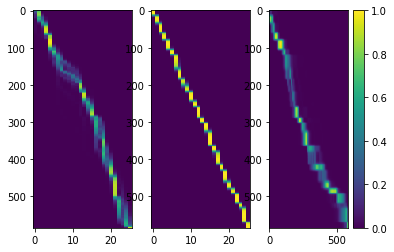

In [34]:
# speaker precede group-averaged listener
t_precede=np.empty(subjn)
p=np.dot(segments_LG,segmentsLG_S.T)
pp=np.divide(p,np.tile(np.sum(p,axis=1)[:,np.newaxis],(1, p.shape[1])))
t_precede=(np.mean(np.dot(pp,range(1,tn+1)))-tn/2)
print(t_precede)
plt.subplot(1,3,1)
plt.imshow(segmentsLG_S,aspect='auto')
plt.subplot(1,3,2)
plt.imshow(segments_LG,aspect='auto')
plt.subplot(1,3,3)
plt.imshow(p,aspect='auto')
plt.colorbar()

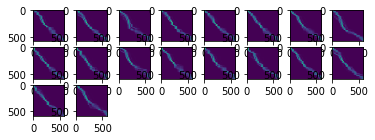

-32.83077953731333


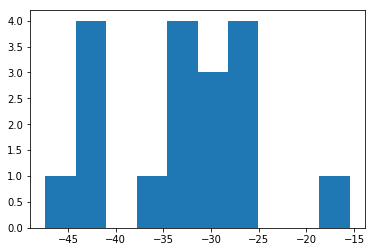

In [35]:
t_precede=np.empty(subjn)
fig = plt.figure()
for si in range(subjn):
    p=np.dot(segmentsLG_L[si],segmentsLG_S.T)
    pp=np.divide(p,np.tile(np.sum(p,axis=1)[:,np.newaxis],(1, p.shape[1])))
    t_precede[si]=(np.mean(np.dot(pp,range(1,tn+1)))-tn/2)
    plt.subplot(6,8,si+1)
    plt.imshow(pp,vmin=0, vmax=0.05)
plt.show()
# fig.savefig('temp.pdf')

print(np.mean(t_precede))
plt.hist(t_precede)
plt.show()

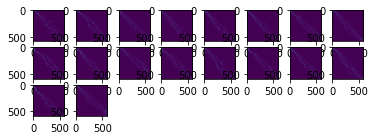

In [36]:
t_precede=np.empty(subjn)
for si in range(subjn):
    p=np.dot(segments_L[si],segmentsL_S.T)
    pp=np.divide(p,np.tile(np.sum(p,axis=1)[:,np.newaxis],(1, p.shape[1])))
    t_precede[si]=(np.mean(np.dot(pp,range(1,tn+1)))-tn/2)
    plt.subplot(6,8,si+1)
    plt.imshow(pp)
plt.show()

-14.291219604891966


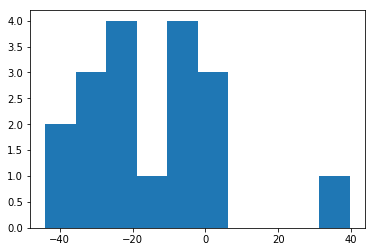

In [37]:
print(np.mean(t_precede))
plt.hist(t_precede)
plt.show()
